In [1]:
%matplotlib inline
import pymunk
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
from IPython.display import HTML

import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

In [3]:
def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(*body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

<IPython.core.display.Javascript object>


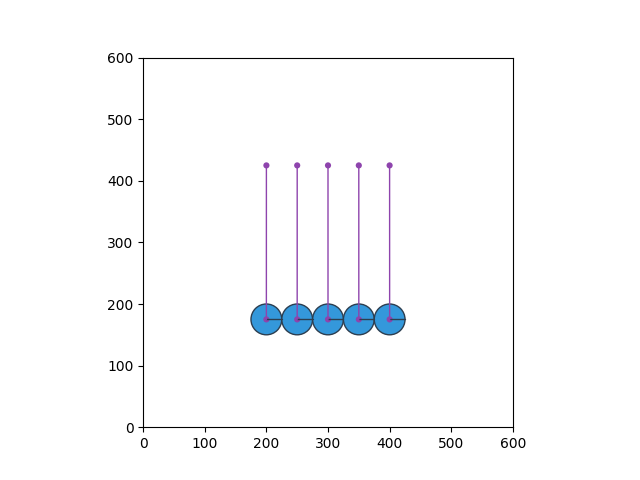

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)


space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    ax.set_xlim(0,600)
    ax.set_ylim(0,600)
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=True)
HTML(anim.to_html5_video())

In [5]:
def fill_space(space, custom_color=(255, 255, 0, 255)):
    captions = []

    ### Static
    captions.append(((50, 680), "Static Shapes"))

    # Static Segments
    segments = [
        pymunk.Segment(space.static_body, (10, 400), (10, 600), 0),
        pymunk.Segment(space.static_body, (20, 400), (20, 600), 1),
        pymunk.Segment(space.static_body, (30, 400), (30, 600), 3),
        pymunk.Segment(space.static_body, (50, 400), (50, 600), 5),
    ]
    space.add(*segments)

    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (40, 630)
    b.angle = 3.14 / 7
    s = pymunk.Segment(b, (-30, 0), (30, 0), 2)
    space.add(b, s)

    # Static Circles
    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (120, 630)
    s = pymunk.Circle(b, 10)
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (120, 630)
    s = pymunk.Circle(b, 10, (-30, 0))
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (120, 560)
    b.angle = 3.14 / 4
    s = pymunk.Circle(b, 40)
    space.add(b, s)

    # Static Polys
    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (120, 460)
    b.angle = 3.14 / 4
    s = pymunk.Poly(b, [(0, -25), (30, 25), (-30, 25)])
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (120, 500)
    t = pymunk.Transform(ty=-100)
    s = pymunk.Poly(b, [(0, -25), (30, 25), (-30, 25)], t, radius=1)
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (50, 430)
    t = pymunk.Transform(ty=-100)
    s = pymunk.Poly(
        b,
        [
            (0.0, -30.0),
            (19.0, -23.0),
            (30.0, -5.0),
            (26.0, 15.0),
            (10.0, 28.0),
            (-10.0, 28.0),
            (-26.0, 15.0),
            (-30.0, -5.0),
            (-19.0, -23.0),
        ],
        t,
    )
    space.add(b, s)

    ### Kinematic
    captions.append(((220, 680), "Kinematic Shapes"))

    # Kinematic Segments
    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    segments = [
        pymunk.Segment(b, (180, 400), (180, 600), 0),
        pymunk.Segment(b, (190, 400), (190, 600), 1),
        pymunk.Segment(b, (200, 400), (200, 600), 3),
        pymunk.Segment(b, (220, 400), (220, 600), 5),
    ]
    space.add(b, *segments)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (210, 630)
    b.angle = 3.14 / 7
    s = pymunk.Segment(b, (-30, 0), (30, 0), 2)
    space.add(b, s)

    # Kinematic Circles
    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (290, 630)
    s = pymunk.Circle(b, 10)
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (290, 630)
    s = pymunk.Circle(b, 10, (-30, 0))
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (290, 560)
    b.angle = 3.14 / 4
    s = pymunk.Circle(b, 40)
    space.add(b, s)

    # Kinematic Polys
    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (290, 460)
    b.angle = 3.14 / 4
    s = pymunk.Poly(b, [(0, -25), (30, 25), (-30, 25)])
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (290, 500)
    t = pymunk.Transform(ty=-100)
    s = pymunk.Poly(b, [(0, -25), (30, 25), (-30, 25)], t, radius=3)
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (230, 430)
    t = pymunk.Transform(ty=-100)
    s = pymunk.Poly(
        b,
        [
            (19.0, -50.0),
            (30.0, -5.0),
            (26.0, 15.0),
            (10.0, 38.0),
            (-10.0, 38.0),
            (-26.0, 15.0),
            (-30.0, -5.0),
            (-19.0, -50.0),
        ],
        t,
    )
    space.add(b, s)

    ### Dynamic
    captions.append(((390, 680), "Dynamic Shapes"))

    # Dynamic Segments
    b = pymunk.Body(1, 1)
    segments = [
        pymunk.Segment(b, (350, 400), (350, 600), 0),
        pymunk.Segment(b, (360, 400), (360, 600), 1),
        pymunk.Segment(b, (370, 400), (370, 600), 3),
        pymunk.Segment(b, (390, 400), (390, 600), 5),
    ]
    space.add(b, *segments)

    b = pymunk.Body(1, 1)
    b.position = (380, 630)
    b.angle = 3.14 / 7
    s = pymunk.Segment(b, (-30, 0), (30, 0), 7)
    space.add(b, s)

    # Dynamic Circles
    b = pymunk.Body(1, 1)
    b.position = (460, 630)
    s = pymunk.Circle(b, 10)
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (460, 630)
    s = pymunk.Circle(b, 10, (-30, 0))
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (460, 560)
    b.angle = 3.14 / 4
    s = pymunk.Circle(b, 40)
    space.add(b, s)

    # Dynamic Polys

    b = pymunk.Body(1, 1)
    b.position = (460, 460)
    b.angle = 3.14 / 4
    s = pymunk.Poly(b, [(0, -25), (30, 25), (-30, 25)])
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (460, 500)
    s = pymunk.Poly(
        b, [(0, -25), (30, 25), (-30, 25)], pymunk.Transform(ty=-100), radius=5
    )
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (400, 430)
    s = pymunk.Poly(
        b, [(0, -50), (50, 0), (30, 50), (-30, 50), (-50, 0)], pymunk.Transform(ty=-100)
    )
    space.add(b, s)

    ###Constraints

    # PinJoints
    captions.append(((560, 660), "Pin Joint"))
    a = pymunk.Body(1, 1)
    a.position = (550, 600)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (650, 620)
    sb = pymunk.Circle(b, 20)
    j = pymunk.PinJoint(a, b, anchor_a=(0, 0), anchor_b=(0, -20))
    space.add(sa, sb, a, b, j)

    # SlideJoints
    captions.append(((560, 560), "Slide Joint"))
    a = pymunk.Body(1, 1)
    a.position = (550, 500)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (650, 520)
    sb = pymunk.Circle(b, 20)
    j = pymunk.SlideJoint(a, b, anchor_a=(0, 20), anchor_b=(0, -20), min=10, max=30)
    space.add(sa, sb, a, b, j)

    # PivotJoints
    captions.append(((560, 460), "Pivot Joint"))
    a = pymunk.Body(1, 1)
    a.position = (550, 400)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (650, 420)
    sb = pymunk.Circle(b, 20)
    j = pymunk.PivotJoint(a, b, (600, 390))
    space.add(sa, sb, a, b, j)

    # GrooveJoints
    captions.append(((760, 660), "Groove Joint"))
    a = pymunk.Body(1, 1)
    a.position = (750, 600)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (850, 620)
    sb = pymunk.Circle(b, 20)
    j = pymunk.GrooveJoint(a, b, (40, 40), (40, -40), (-60, 0))
    space.add(sa, sb, a, b, j)

    # DampedSpring
    captions.append(((760, 550), "Damped Spring"))
    a = pymunk.Body(1, 1)
    a.position = (750, 480)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (850, 500)
    sb = pymunk.Circle(b, 20)
    j = pymunk.DampedSpring(a, b, (0, 0), (0, 10), 100, 1, 1)
    space.add(sa, sb, a, b, j)

    # DampedRotarySpring
    captions.append(((740, 430), "Damped Rotary Spring"))
    a = pymunk.Body(1, 1)
    a.position = (750, 350)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (850, 380)
    sb = pymunk.Circle(b, 20)
    j = pymunk.DampedRotarySpring(a, b, 10, 1, 1)
    space.add(sa, sb, a, b, j)

    # RotaryLimitJoint
    captions.append(((740, 300), "Rotary Limit Joint"))
    a = pymunk.Body(1, 1)
    a.position = (750, 220)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (850, 250)
    sb = pymunk.Circle(b, 20)
    j = pymunk.RotaryLimitJoint(a, b, 1, 2)
    b.angle = 3
    space.add(sa, sb, a, b, j)

    # RatchetJoint
    captions.append(((740, 170), "Ratchet Joint"))
    a = pymunk.Body(1, 1)
    a.position = (750, 100)
    sa = pymunk.Circle(a, 20)
    b = pymunk.Body(1, 1)
    b.position = (850, 120)
    sb = pymunk.Circle(b, 20)
    j = pymunk.RatchetJoint(a, b, 1, 0.1)
    b.angle = 3
    space.add(sa, sb, a, b, j)

    # GearJoint and SimpleMotor omitted since they are similar to the already
    # added joints

    # TODO: more stuff here :)

    ### Other

    # Objects in custom color
    captions.append(((150, 150), "Custom Color (static, kinematic & dynamic)"))
    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (200, 200)
    s = pymunk.Circle(b, 30)
    s.color = custom_color
    space.add(b, s)

    b = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    b.position = (300, 200)
    s = pymunk.Circle(b, 30)
    s.color = custom_color
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (400, 200)
    s = pymunk.Circle(b, 30)
    s.color = custom_color
    space.add(b, s)

    # Collision
    captions.append(((550, 150), "Collisions"))
    b = pymunk.Body(body_type=pymunk.Body.STATIC)
    b.position = (570, 200)
    s = pymunk.Circle(b, 40)
    space.add(b, s)

    b = pymunk.Body(1, 1)
    b.position = (590, 250)
    s = pymunk.Circle(b, 40)
    space.add(b, s)

    # Sleeping
    captions.append(((50, 150), "Sleeping"))
    b = pymunk.Body(1, 1)
    b.position = (75, 200)
    space.sleep_time_threshold = 0.01
    s = pymunk.Circle(b, 40)
    space.add(s, b)
    b.sleep()
    space.step(0.000001)

    return captions

<IPython.core.display.Javascript object>


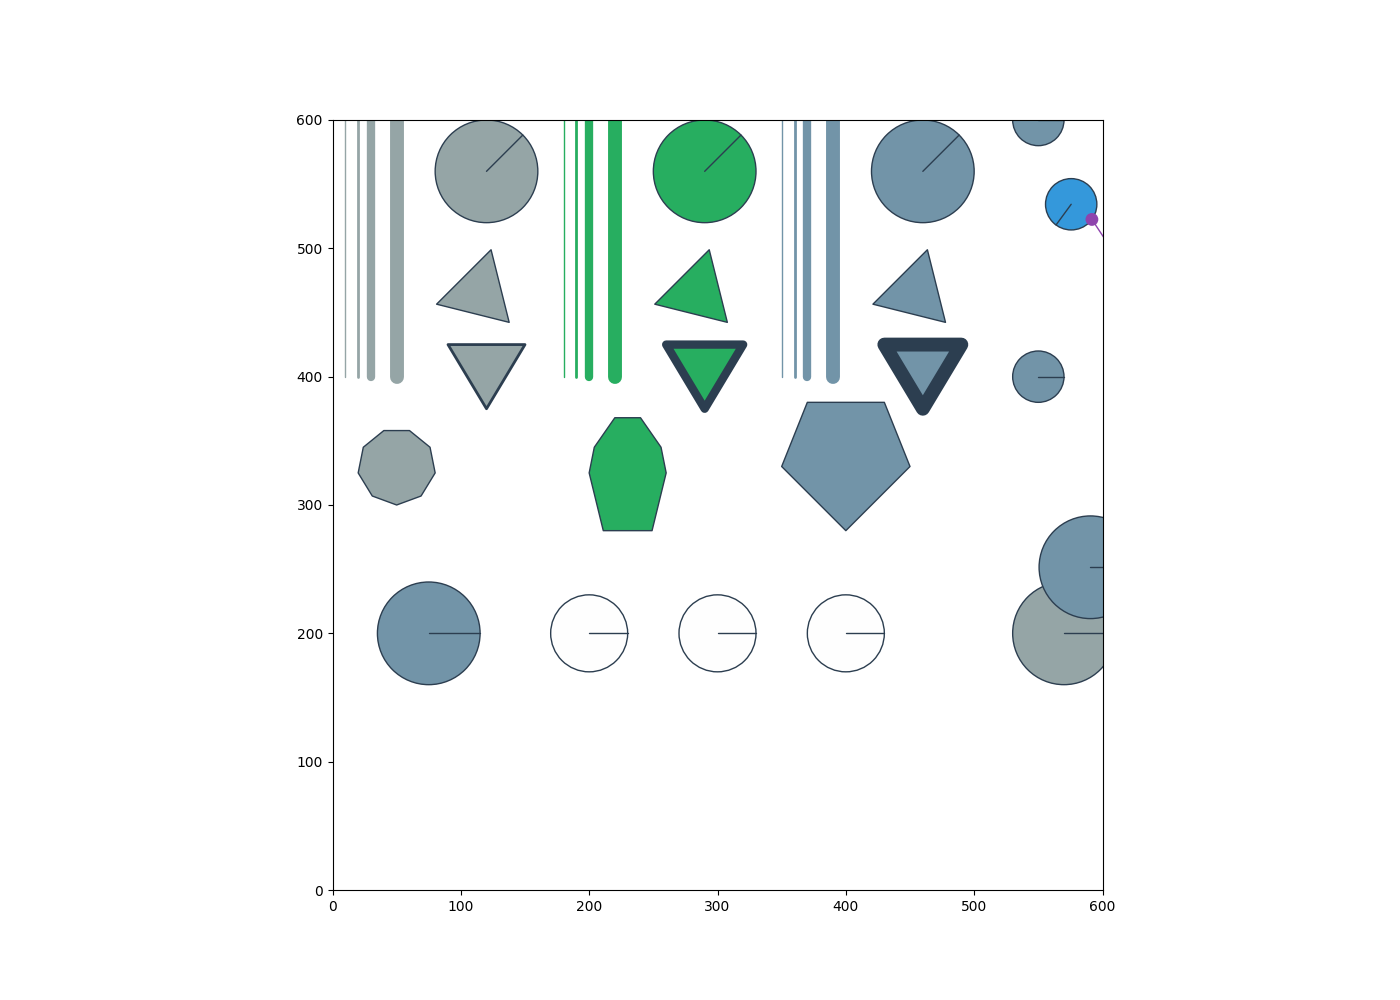

In [6]:
space = pymunk.Space()
captions = fill_space(space, (1,1,0,1))

fig = plt.figure(figsize=(14,10))
ax = plt.axes(xlim=(0, 1000), ylim=(0, 700))
ax.set_aspect("equal")
for caption in captions:
    x, y = caption[0]
    y = y - 15
    ax.text(x, y, caption[1], fontsize=12)
o = pymunk.matplotlib_util.DrawOptions(ax)
space.debug_draw(o)
fig.savefig("matplotlib_util_demo.png", bbox_inches="tight")